Now we have a clean dataset made up of an outcome variable and a set of other variables that initial explorations and/or domain knowledge suggest would be valuable in our model.  The next step is to transform our potential predictor variables into *features*.  Features are variables that have been transformed in ways that make them best-suited to work within our model to explain variance in the outcome of interest.  Feature engineering is a [broad and complex topic](http://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/), and an opportunity to get creative with your data.  In the next section, we’ll talk about how to pare down a set of features into the best ones for your problem, but to do that we need lots and lots of different features that highlight different information from the data.

Feature engineering can be a lot of fun: there are very few limits on what you can try.  For the rest of this checkpoint, we'll go through some feature engineering options using an example. When working with your data, don’t limit yourself to what you see here – try anything that you think will highlight a particular feature within your dataset.

We'll continue to work with the European Social Survey Data from the last checkpoint.  The data, if you need it again, is [here](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv) and the codebook is available [here](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set the default plot aesthetics to be prettier.
sns.set_style("white")

In [2]:
# Loading the data again.

df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")

# Take a subset of the data to make plots clearer.
print(df.head())

print(df.cntry.unique())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4    CH  29.0     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  
2   1.0  24.0      2.0  
3   2.0  64.0      1.0  
4   2.0  55.0      1.0  
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


# Fun with categorical variables

Most models will only run on numerical data.  To get the information from a categorical variable with X levels, we need to create X-1 numerical features, each of which is coded 1 or 0.  While the ‘cntry’ variable has six levels, only five features are needed to represent all of the information:  if we know that the values for `‘CH’`,`'CZ'`,`'DE'`,`'ES'`, and `'NO'` are 0, then we also know that the value for `‘SE’` must be 1.  The level without a feature is called the _reference_ value.

We could also make an indicator that gathers together categories we think are related.  For instance, we could make a 'Nordic Countries' indicator that tells us if a row has data from Norway or Sweden.

In [3]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['cntry'])

# Nordic countries dummy.
features['Nordic'] = np.where((df['cntry'].isin(['NO', 'SE'])), 1, 0)

print(pd.crosstab(features['Nordic'], df['cntry']))

cntry     CH    CZ  DE    ES    NO    SE
Nordic                                  
0       1546  1316  28  2426     0     0
1          0     0   0     0  1462  1816


# Changing variable types

We can also take a continuous variable and make it categorical.  For example, if we were interested in comparing older adults (age > 65) to all other ages in the sample, we could make an 'OlderAdult' indicator feature:

In [4]:
features['Adult_65plus'] = np.where(df['agea']>=65, 1, 0)

# Check to make sure it worked.
print(df['agea'].groupby(features['Adult_65plus']).describe())

               count       mean        std   min   25%   50%   75%    max
Adult_65plus                                                             
0             6682.0  40.874738  13.958596  15.0  29.0  42.0  53.0   64.0
1             1673.0  73.815302   6.650086  65.0  69.0  72.0  78.0  114.0


## Thinking Like a Data Scientist

While a programmer thinks in terms of strings, ints, and floats, a data scientist sees variables as categorical (also called nominal) or continuous, and within the continuous group subdivided into _ordinal_, _interval_, and _ratio_.

### Ordinal variables

Ordinal variables indicate rank-order.  For example, runners could be scored 1 for first place, 2 for second place, 3 for third place, etc.   However, an ordinal variable does not give any information on the distance between the scores.  We know that the 1st-place runner was faster than the 2nd-place runner, but the difference in their times (the distance between them within the variable) could be minutes or milliseconds.  In addition, the difference in times between 1st and 2nd place is probably not the same as the difference in times between 2nd and 3rd place.  

Ordinal variables are often treated like categorical features in analyses, because it doesn't make sense to use them in most mathematical operations.


### Interval variables

Interval variables indicate both rank-order and distance.  Temperature is a good example of an interval variable.  The distance between 30 and 40 degrees Fahrenheit is the same as the distance between 70 and 80 degrees (10 degrees).  Interval variables lack an absolute zero point-- a temperature of 0 degrees Fahrenheit does not mean that there is no warmth in the air at all!  The lack of an absolute zero point means that we cannot logically make a ratio from an interval variable- 60 degrees F, for example, is not twice as hot as 30 degrees F. 

Interval variables can be treated as either categorical or continuous features, depending on how comfortable you are with the assumption made by most models that a continuous variable naturally has an absolute zero point.


### Ratio variables

Finally, ratio variables indicate rank, distance, and a meaningful absolute zero value – when a ratio variable has a score of 0, we know that none of the quantity measured by the variable is present.  Age is a ratio variable: Somebody 0 years old has not been born yet, and someone 20 years old has lived twice as long as someone 10 years old.


## TLADS Drill

Categorize each of the variables in the ESS dataset as categorical or continuous, and if continuous as ordinal, interval, or ratio variables.  Check your work with your mentor, and discuss what that information might imply for feature engineering with this data.

# Combining two or more highly-correlated variables

Many models assume that features are correlated with the outcome, but uncorrelated with each other.   Two highly-correlated variables can be averaged to create a feature, or one can be dropped.  Three or more highly-correlated variables can also be combined using a statistical method called **Principal Components Analysis** ("PCA") that reduces the correlated set of variables into a smaller set of uncorrelated features.  We’ll do an in-depth introduction to PCA in the next assignment.


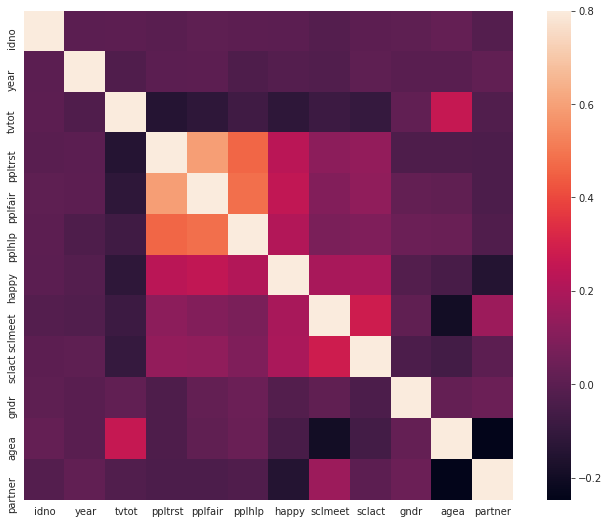

                  ppltrst   pplfair    pplhlp  trust_fair_help
ppltrst          1.000000  0.592001  0.462562         0.834209
pplfair          0.592001  1.000000  0.480918         0.841674
pplhlp           0.462562  0.480918  1.000000         0.789318
trust_fair_help  0.834209  0.841674  0.789318         1.000000


In [5]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Looks like 'pplfair','ppltrst' and 'pplhlp' are pretty redundant with each
# other. Let's make some averages. Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)
features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['ppltrst', 'pplfair', 'pplhlp']]
plotdf['trust_fair_help'] = features['trust_fair_help'] 
corrmat2 = plotdf.corr()

print(corrmat2)

## Dealing with non-normality

If normality is a model-assumption (and it often is), then non-normal variables can sometimes be transformed into normally-distributed features using transformations such as taking the square root, the inverse, or the log of the variable. 

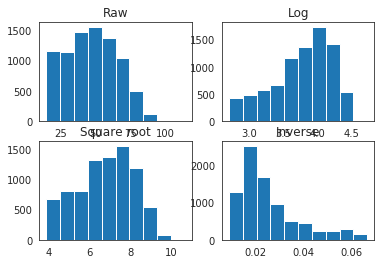

In [6]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['agea'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['agea'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['agea'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['agea'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_age'] = np.log(df['agea'])

## Creating linear relationships

Many models assume that the relationship between a feature and an outcome is linear.  Sometimes, though, you want to include a variable that has a non-linear component to its relationship with the outcome. To capture non-linearity while keeping the model happy, it can be helpful to create quadratic or higher-level features by squaring, cubing, or otherwise multiplying a variable by itself. 


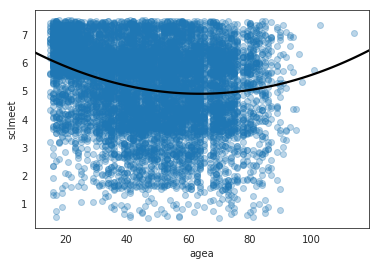

In [7]:
sns.regplot(
    df['agea'],
    y=df['sclmeet'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['age_squared'] = df['agea'] * df['agea']

## Making variables easier to understand in light of the research question

If the research question involves centimeters but a variable is measured in feet, you can create a feature that uses centimeters to make model results easier to interpret in terms of the research question.

You can also re-encode a variable into a feature that matches the terminology of the research question.  A research question about "sadness" will be easier to answer if relevant variables are coded into features where higher values indicate greater, rather than less, sadness.

For example, if our research question is about predicting time spent watching television, and we think sad people may watch more, then recoding our "happy" variable will make the correlation between `'tvtot'` and `'happy'` a little simpler to parse.

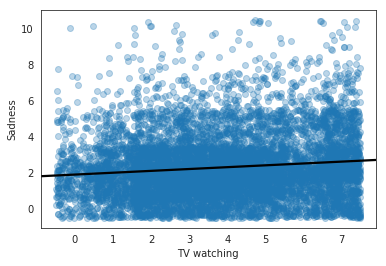

In [8]:
# Reverse-coding the 'happy' variable so that higher scores mean less
# happiness (and thus possibly more sadness).

features['Sadness'] = max(df['happy']) - df['happy']

sns.regplot(
    df['tvtot'],
    features['Sadness'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('TV watching')
plt.ylabel('Sadness')
plt.show()

# Leveling the playing field

Some modeling methods assume that all features have values in the same range (all features have a min of 0 and max of 1, for example).  Features that vary in range can result in incorrect estimates.  We can normalize all the variables to the same scale (usually a mean of 0 and standard deviation of 1):

/Users/benjaminwhite/sites/Thinkful/curricula/data-science-bootcamp/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  del sys.path[0]


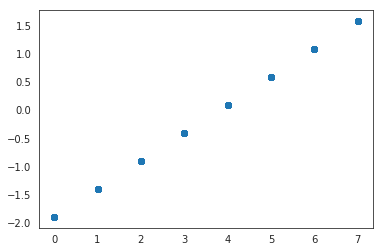

               idno          year         tvtot       ppltrst       pplfair  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -6.977221e-18 -5.302688e-16 -5.930638e-17 -8.372665e-17  1.814077e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00   
min   -6.364414e-02 -1.000614e+00 -1.900914e+00 -2.516209e+00 -2.832624e+00   
25%   -6.196385e-02 -1.000614e+00 -9.053021e-01 -7.108364e-01 -4.741304e-01   
50%   -6.087847e-02  9.993865e-01  9.031023e-02  1.918499e-01 -2.431735e-03   
75%   -5.925039e-02  9.993865e-01  5.881164e-01  6.431931e-01  9.409657e-01   
max    1.734276e+01  9.993865e-01  1.583729e+00  1.997223e+00  1.884363e+00   

             pplhlp         happy       sclmeet        sclact          gndr  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -9.768109e-17  2.372255e-16 -1.116355e-16 -2.581572e-16  1.186128e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.

In [9]:
# If this is the first time you're using scikit-learn you'll first want to do
# pip install sklearn from your terminal to install the package.
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['tvtot'], df_scaled['tvtot'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

# All about interactions

If you suspect that the relationship between the outcome and a feature depends on the value of a second feature, you may want to create a feature that represents the interaction.

For example, perhaps watching more TV only makes people sad if they do it alone.  People who live with a partner are probably less likely to watch TV alone.  To represent the concept that people who live with a romantic partner don't get sad watching TV but people who don't live with a romantic partner do get sad, we can multiply our 'partner' indicator by the 'sadness' feature to create the interaction.


/Users/benjaminwhite/sites/Thinkful/curricula/data-science-bootcamp/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


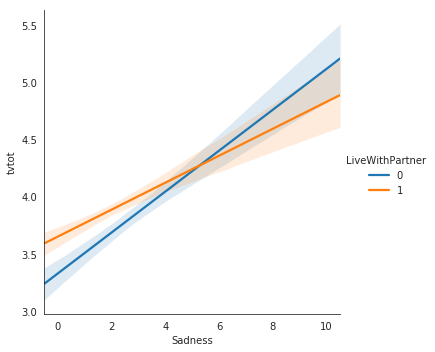

In [10]:
# Create a better indicator for 'partner.' Currently it is coded 1 for
# living with a partner and 2 for not living with a partner.
features['LiveWithPartner'] = np.where(df['partner'] == 1, 1, 0)

# Create the interaction.
features['Sad_Partner'] = features['Sadness'] * features['LiveWithPartner']

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
features['tvtot'] = df['tvtot']
sns.lmplot(
    x='Sadness',
    y='tvtot',
    hue='LiveWithPartner',
    data=features,
    scatter=False
)
plt.show()

It does indeed look like people who don't live with a partner watch more TV when sad (or get sadder when watching TV), so this interaction term might be a useful feature to include.

# Conclusion

This is just a taste of the feature engineering fun you can have.  Feature engineering is where you customize your data based on domain knowledge, the research question at hand, the nature of the data, the type of model(s) you intend to try, and the limitations of your hardware or software.  A broader range of features generally leads to models with greater predictive power, though this will need to be balanced with the increased processing time that comes with really large numbers of features as well as concerns of overfitting.

Enjoy!

###### Don't forget to submit your TDLAS drill below.
